<a href="https://colab.research.google.com/github/sharma18yash/ire_project/blob/main/base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import os
import json
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# zip = zipfile.ZipFile('/content/drive/MyDrive/Ire_project/train_data.zip','r')
# zip.extractall('/content/drive/MyDrive/Ire_project')
# zip.close()
# # !unzip '/content/drive/MyDrive/Ire_project/train_data.zip' -d '/content/drive/MyDrive/Ire_project'

In [65]:
df = pd.read_csv('/content/drive/MyDrive/Ire_project/semeval-2022_task8_train-data_batch.csv')

In [66]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   url1_lang  4964 non-null   object 
 1   url2_lang  4964 non-null   object 
 2   pair_id    4964 non-null   object 
 3   link1      4964 non-null   object 
 4   link2      4964 non-null   object 
 5   ia_link1   4964 non-null   object 
 6   ia_link2   4964 non-null   object 
 7   Geography  4964 non-null   float64
 8   Entities   4964 non-null   float64
 9   Time       4964 non-null   float64
 10  Narrative  4964 non-null   float64
 11  Overall    4964 non-null   float64
 12  Style      4964 non-null   float64
 13  Tone       4964 non-null   float64
dtypes: float64(7), object(7)
memory usage: 543.1+ KB
None


,url1_lang,url2_lang,pair_id,link1,link2,ia_link1,ia_link2,Geography,Entities,Time,Narrative,Overall,Style,Tone
0,en,en,1484084337_1484110209,https://www.washingtonpost.com/local/virginia-...,https://www.washingtonpost.com/world/the_ameri...,https://web.archive.org/web/www.washingtonpost...,https://web.archive.org/web/www.washingtonpost...,4.0,4.000000,1.000000,4.000000,4.000000,1.666667,2.000000
1,en,en,1484396422_1483924666,https://www.stlucianewsonline.com/guyana-three...,https://www.thestar.com/news/world/europe/2020...,https://web.archive.org/web/www.stlucianewsonl...,https://web.archive.org/web/www.thestar.com/ne...,4.0,4.000000,1.000000,4.000000,3.666667,1.666667,1.333333
2,en,en,1484698254_1483758694,https://www.teaparty.org/trump-brings-in-2020-...,https://www.timesofisrael.com/trump-says-he-do...,https://web.archive.org/web/www.teaparty.org/t...,https://web.archive.org/web/www.timesofisrael....,1.0,2.000000,1.000000,2.333333,2.333333,1.000000,1.333333
3,en,en,1576314516_1576455088,https://gadgets.ndtv.com/apps/news/zomato-uber...,https://gadgets.ndtv.com/internet/news/indian-...,https://web.archive.org/web/gadgets.ndtv.com/a...,https://web.archive.org/web/gadgets.ndtv.com/i...,1.0,2.333333,2.666667,1.666667,2.000000,1.666667,1.666667
4,en,en,1484036253_1483894099,https://news.yahoo.com/india-approves-third-mo...,https://www.channelnewsasia.com/news/asia/indi...,https://web.archive.org/web/news.yahoo.com/ind...,https://web.archive.org/web/www.channelnewsasi...,1.0,1.250000,1.000000,1.250000,1.250000,1.000000,1.000000


In [67]:
print(set(df[:]['url1_lang'] ),set( df[:]['url2_lang']))

{'tr', 'pl', 'fr', 'en', 'de', 'es', 'ar'} {'tr', 'pl', 'fr', 'en', 'de', 'es', 'ar'}


In [68]:
df_en = df.loc[(df['url1_lang'] == 'en') & (df['url2_lang'] == 'en')]
print(df_en.shape)
df_en.head()

(1800, 14)


,url1_lang,url2_lang,pair_id,link1,link2,ia_link1,ia_link2,Geography,Entities,Time,Narrative,Overall,Style,Tone
0,en,en,1484084337_1484110209,https://www.washingtonpost.com/local/virginia-...,https://www.washingtonpost.com/world/the_ameri...,https://web.archive.org/web/www.washingtonpost...,https://web.archive.org/web/www.washingtonpost...,4.0,4.000000,1.000000,4.000000,4.000000,1.666667,2.000000
1,en,en,1484396422_1483924666,https://www.stlucianewsonline.com/guyana-three...,https://www.thestar.com/news/world/europe/2020...,https://web.archive.org/web/www.stlucianewsonl...,https://web.archive.org/web/www.thestar.com/ne...,4.0,4.000000,1.000000,4.000000,3.666667,1.666667,1.333333
2,en,en,1484698254_1483758694,https://www.teaparty.org/trump-brings-in-2020-...,https://www.timesofisrael.com/trump-says-he-do...,https://web.archive.org/web/www.teaparty.org/t...,https://web.archive.org/web/www.timesofisrael....,1.0,2.000000,1.000000,2.333333,2.333333,1.000000,1.333333
3,en,en,1576314516_1576455088,https://gadgets.ndtv.com/apps/news/zomato-uber...,https://gadgets.ndtv.com/internet/news/indian-...,https://web.archive.org/web/gadgets.ndtv.com/a...,https://web.archive.org/web/gadgets.ndtv.com/i...,1.0,2.333333,2.666667,1.666667,2.000000,1.666667,1.666667
4,en,en,1484036253_1483894099,https://news.yahoo.com/india-approves-third-mo...,https://www.channelnewsasia.com/news/asia/indi...,https://web.archive.org/web/news.yahoo.com/ind...,https://web.archive.org/web/www.channelnewsasi...,1.0,1.250000,1.000000,1.250000,1.250000,1.000000,1.000000


In [69]:
df_en['doc_id1'] = df_en.apply(lambda x: str(x.pair_id).split('_')[0],axis = 1)
df_en['doc_id2'] = df_en.apply(lambda x: str(x.pair_id).split('_')[1],axis = 1)
df_en.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,url1_lang,url2_lang,pair_id,link1,link2,ia_link1,ia_link2,Geography,Entities,Time,Narrative,Overall,Style,Tone,doc_id1,doc_id2
0,en,en,1484084337_1484110209,https://www.washingtonpost.com/local/virginia-...,https://www.washingtonpost.com/world/the_ameri...,https://web.archive.org/web/www.washingtonpost...,https://web.archive.org/web/www.washingtonpost...,4.0,4.000000,1.000000,4.000000,4.000000,1.666667,2.000000,1484084337,1484110209
1,en,en,1484396422_1483924666,https://www.stlucianewsonline.com/guyana-three...,https://www.thestar.com/news/world/europe/2020...,https://web.archive.org/web/www.stlucianewsonl...,https://web.archive.org/web/www.thestar.com/ne...,4.0,4.000000,1.000000,4.000000,3.666667,1.666667,1.333333,1484396422,1483924666
2,en,en,1484698254_1483758694,https://www.teaparty.org/trump-brings-in-2020-...,https://www.timesofisrael.com/trump-says-he-do...,https://web.archive.org/web/www.teaparty.org/t...,https://web.archive.org/web/www.timesofisrael....,1.0,2.000000,1.000000,2.333333,2.333333,1.000000,1.333333,1484698254,1483758694
3,en,en,1576314516_1576455088,https://gadgets.ndtv.com/apps/news/zomato-uber...,https://gadgets.ndtv.com/internet/news/indian-...,https://web.archive.org/web/gadgets.ndtv.com/a...,https://web.archive.org/web/gadgets.ndtv.com/i...,1.0,2.333333,2.666667,1.666667,2.000000,1.666667,1.666667,1576314516,1576455088
4,en,en,1484036253_1483894099,https://news.yahoo.com/india-approves-third-mo...,https://www.channelnewsasia.com/news/asia/indi...,https://web.archive.org/web/news.yahoo.com/ind...,https://web.archive.org/web/www.channelnewsasi...,1.0,1.250000,1.000000,1.250000,1.250000,1.000000,1.000000,1484036253,1483894099


In [70]:
df_en.keys()

Index(['url1_lang', 'url2_lang', 'pair_id', 'link1', 'link2', 'ia_link1',
       'ia_link2', 'Geography', 'Entities', 'Time', 'Narrative', 'Overall',
       'Style', 'Tone', 'doc_id1', 'doc_id2'],
      dtype='object')

In [71]:
df_en = df_en.drop(['url1_lang', 'url2_lang', 'pair_id', 'link1', 'link2', 'ia_link1','ia_link2'],axis = 1)

In [72]:
def clean_text(str):
  str = re.sub("[^.0-9A-Za-z ]", "" , str)
  str = re.sub(' +',' ',str)
  str = str.strip()
  return str.lower();

In [ ]:
count = 0
row_count = 0
keywords1 = list() 
keywords2 = list()
desc1 = list()
desc2 = list()
time1 = list()
time2 = list()
title1 = list()
title2 = list()
text1 = list()
text2 = list()
for ind , row in df_en.iterrows():
  # print(row['doc_id1'])
  row_count += 1
  file_name1 = '/content/drive/MyDrive/Ire_project/train_data/' + str(int(row['doc_id1'])%100) + '/' + row['doc_id1'] + '.json'
  file_name2 = '/content/drive/MyDrive/Ire_project/train_data/' + str(int(row['doc_id2'])%100) + '/' + row['doc_id2'] + '.json'
  # file1_json , file2_json
  # print(file_name1,file_name2)
  if (os.path.isfile(file_name1)  and os.path.isfile(file_name2)):
    count += 1
    with open(file_name1,'r') as f:
      file1_json = json.load(f)
      title1.append(clean_text(file1_json['title']))
      # print('len:',len(title1),' Count:',count,'Title:',clean_text(file1_json['title']),'id:',row['doc_id1'])
      text1.append(clean_text(file1_json['text']))
      meta_desc = ''
      desc = ''
      if file1_json.get('meta_description') != None :
        meta_desc = file1_json['meta_description']
      if file1_json['meta_data'].get('description') != None :
        desc = file1_json['meta_data']['description']
      if (len(desc) > len(meta_desc)) :
        desc1.append(clean_text(desc))
      else:
        desc1.append(clean_text(meta_desc))
      keywords = list()
      if file1_json.get('keywords') != None :
        keywords += file1_json['keywords']
      if file1_json.get('meta_keywords') != None :
        keywords += file1_json['meta_keywords']
      if file1_json['meta_data'].get('news_keywords') != None :
        keywords += (file1_json['meta_data']['news_keywords'].split(','))
      if file1_json['meta_data'].get('keywords') != None :
        keywords += (file1_json['meta_data']['keywords'].split(','))
      keywords1.append(list(set(keywords)))
    f.close()
    with open(file_name2,'r') as f:
      file2_json = json.load(f)
      title2.append(clean_text(file2_json['title']))
      text2.append(clean_text(file2_json['text']))
      meta_desc = ''
      desc = ''
      if file2_json.get('meta_description') != None :
        meta_desc = file2_json['meta_description']
      if file2_json['meta_data'].get('description') != None :
        desc = file2_json['meta_data']['description']
      if (len(desc) > len(meta_desc)) :
        desc2.append(clean_text(desc))
      else:
        desc2.append(clean_text(meta_desc))
      keywords = list()
      if file2_json.get('keywords') != None :
        keywords += file2_json['keywords']
      if file2_json.get('meta_keywords') != None :
        keywords += file2_json['meta_keywords']
      if file2_json['meta_data'].get('news_keywords') != None :
        keywords += (file2_json['meta_data']['news_keywords'].split(','))
      if file2_json['meta_data'].get('keywords') != None :
        keywords += (file2_json['meta_data']['keywords'].split(','))
      keywords2.append(list(set(keywords)))
    f.close()
print('count:',count)
print('row_count',row_count)

count: 1416
row_count 1800


In [73]:
count = 0
row_count = 0
# for text with full stops
text1_sent = list()
text2_sent = list()
for ind , row in df_en.iterrows():
  # print(row['doc_id1'])
  row_count += 1
  file_name1 = '/content/drive/MyDrive/Ire_project/train_data/' + str(int(row['doc_id1'])%100) + '/' + row['doc_id1'] + '.json'
  file_name2 = '/content/drive/MyDrive/Ire_project/train_data/' + str(int(row['doc_id2'])%100) + '/' + row['doc_id2'] + '.json'
  # file1_json , file2_json
  # print(file_name1,file_name2)
  if (os.path.isfile(file_name1)  and os.path.isfile(file_name2)):
    count += 1
    with open(file_name1,'r') as f:
      file1_json = json.load(f)
      text1_sent.append(clean_text(file1_json['text']))
    f.close()
    with open(file_name2,'r') as f:
      file2_json = json.load(f)
      text2_sent.append(clean_text(file2_json['text']))
    f.close()
print('count:',count)
print('row_count',row_count)

count: 1416
row_count 1800


In [76]:
text1_sent[0]

'share this onpin 11 sharesnews room guyana three persons are currently hospitalized in a serious condition following an accident on the crabwood creek public road on new years morning.according to information received motorcar pnn 7976 driven by 22yearold seeram ramdat was speeding when it collided with a utility pole injuring the driver and two passengers.the news room understands that while driving over the blackwater creek bridge ramdat lost control of the vehicle which turned turtle and careened about 200 feet away before crashing into the utility pole and coming to a halt on a residents bridge.the two occupants 32yearold keron phillips and 45yearold ramnand kishwar were removed from the wreck in semiconscious states and rushed to the skeldon hospital.the driver fled the scene and was subsequently apprehended at his lot 80 grant 1718 crabwood creek home in a traumatic state. he was also taken to the skeldon hospital where he is admitted in a stable condition.the news room understa

In [ ]:
for i in range(len(keywords1)):
  for j in range(len(keywords1[i])):
    keywords1[i][j] = clean_text(keywords1[i][j])
  keywords1[i] = list(set(keywords1[i]))

for i in range(len(keywords2)):
  for j in range(len(keywords2[i])):
    keywords2[i][j] = clean_text(keywords2[i][j])
  keywords2[i] = list(set(keywords2[i]))

In [ ]:
correct_files = list()
i = 0
for ind , row in df_en.iterrows():
  file_name1 = '/content/drive/MyDrive/Ire_project/train_data/' + str(int(row['doc_id1'])%100) + '/' + row['doc_id1'] + '.json'
  file_name2 = '/content/drive/MyDrive/Ire_project/train_data/' + str(int(row['doc_id2'])%100) + '/' + row['doc_id2'] + '.json'
  if (os.path.isfile(file_name1)  and os.path.isfile(file_name2)):
    correct_files.append(i)
  i+=1
len(correct_files)

1416

In [ ]:
print(correct_files)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 34, 36, 37, 38, 39, 40, 41, 44, 46, 47, 48, 49, 50, 51, 52, 54, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 80, 81, 82, 83, 84, 85, 87, 88, 90, 91, 92, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 114, 115, 116, 117, 118, 121, 123, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 139, 141, 142, 143, 144, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 186, 188, 189, 190, 191, 193, 194, 195, 197, 198, 200, 202, 203, 204, 207, 208, 209, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 241, 242, 243, 244, 245, 246, 248, 249, 250, 251, 252, 253, 254, 256, 257, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269

In [ ]:
print(df_en.shape)
df_en.tail(5)

(1800, 9)


,Geography,Entities,Time,Narrative,Overall,Style,Tone,doc_id1,doc_id2
3444,4.0,3.0,1.0,2.0,3.0,1.0,1.0,1602628318,1522567203
3445,1.0,4.0,3.0,4.0,4.0,2.0,1.0,1558724916,1578120789
3446,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1516170185,1515943366
3447,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1511216591,1511221676
3448,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1502772737,1502868502


In [ ]:
df_en_exist = df_en.iloc[correct_files]
df_en_exist.shape

(1416, 9)

In [79]:
df_en_exist.head()

,Unnamed: 0,Geography,Entities,Time,Narrative,Overall,Style,Tone,doc_id1,doc_id2,title1,title2,desc1,desc2,text1,text2,keywords1,keywords2,text1_sent,text2_sent
0,1,4.00,4.000000,1.000000,4.000000,3.666667,1.666667,1.333333,1484396422,1483924666,guyana three injured after car crashes into ut...,fire kills more than 30 animals at zoo in west...,NaN,berlin a fire at a zoo in western germany in t...,share this onpin 11 sharesnews room guyana thr...,berlin a fire at a zoo in western germany in t...,[''],"['smg2world', 'smgeurope', 'smg2news']",share this onpin 11 sharesnews room guyana thr...,berlin a fire at a zoo in western germany in t...
1,2,1.00,2.000000,1.000000,2.333333,2.333333,1.000000,1.333333,1484698254,1483758694,trump brings in 2020 at maralago were going to...,trump says he does not expect war with iran li...,NaN,us president says response to rioting by proir...,breitbart president donald trump welcomed gues...,palm beach united states us president donald t...,[''],[''],breitbart president donald trump welcomed gues...,palm beach united states us president donald t...
2,3,1.00,2.333333,2.666667,1.666667,2.000000,1.666667,1.666667,1576314516,1576455088,zomato buys ubers food delivery business in in...,indian online food delivery market to hit 8 bi...,zomato on tuesday announced it has acquired ub...,the report by google and boston consulting gro...,uber has sold its online foodordering business...,rapid digitisation and growth in both online b...,['zomato uber eats business acquisition india ...,"['swiggy', 'zomato', 'indian online food deliv...",uber has sold its online foodordering business...,rapid digitisation and growth in both online b...
3,4,1.00,1.250000,1.000000,1.250000,1.250000,1.000000,1.000000,1484036253,1483894099,india approves third moon mission months after...,india targets new moon mission in 2020,india has approved its third lunar mission mon...,india plans to make a fresh attempt to land an...,bengaluru reuters india has approved its third...,bangalore india plans to make a fresh attempt ...,"['', 'lunar orbiter', 'india', 'land on the mo...","['space', 'india']",bengaluru reuters india has approved its third...,bangalore india plans to make a fresh attempt ...
4,5,1.25,1.750000,1.250000,1.750000,2.000000,1.000000,1.250000,1484189120,1484113136,wiesenthal center calls for fbi task force to ...,jewish groups react to monsey stabbings,the simon wiesenthal center called on the whit...,jewish groups have expressed shock and horror ...,the simon wiesenthal center called on the whit...,jewish groups have expressed shock and horror ...,[''],[''],the simon wiesenthal center called on the whit...,jewish groups have expressed shock and horror ...


In [ ]:
len(title2)

1416

In [78]:
df_en_exist['title1'] = title1
df_en_exist['title2'] = title2
df_en_exist['desc1'] = desc1
df_en_exist['desc2'] = desc2
df_en_exist['text1'] = text1
df_en_exist['text2'] = text2
df_en_exist['keywords1'] = keywords1
df_en_exist['keywords2'] = keywords2
df_en_exist['text1_sent'] = text1_sent
df_en_exist['text2_sent'] = text2_sent

In [ ]:
df_en_exist.head()

,Geography,Entities,Time,Narrative,Overall,Style,Tone,doc_id1,doc_id2,title1,title2,desc1,desc2,text1,text2,keywords1,keywords2
1,4.00,4.000000,1.000000,4.000000,3.666667,1.666667,1.333333,1484396422,1483924666,guyana three injured after car crashes into ut...,fire kills more than 30 animals at zoo in west...,,berlin a fire at a zoo in western germany in t...,share this onpin 11 sharesnews room guyana thr...,berlin a fire at a zoo in western germany in t...,[],"[smg2world, smgeurope, smg2news]"
2,1.00,2.000000,1.000000,2.333333,2.333333,1.000000,1.333333,1484698254,1483758694,trump brings in 2020 at maralago were going to...,trump says he does not expect war with iran li...,,us president says response to rioting by proir...,breitbart president donald trump welcomed gues...,palm beach united states us president donald t...,[],[]
3,1.00,2.333333,2.666667,1.666667,2.000000,1.666667,1.666667,1576314516,1576455088,zomato buys ubers food delivery business in in...,indian online food delivery market to hit 8 bi...,zomato on tuesday announced it has acquired ub...,the report by google and boston consulting gro...,uber has sold its online foodordering business...,rapid digitisation and growth in both online b...,[zomato uber eats business acquisition india a...,"[swiggy, zomato, indian online food delivery m..."
4,1.00,1.250000,1.000000,1.250000,1.250000,1.000000,1.000000,1484036253,1483894099,india approves third moon mission months after...,india targets new moon mission in 2020,india has approved its third lunar mission mon...,india plans to make a fresh attempt to land an...,bengaluru reuters india has approved its third...,bangalore india plans to make a fresh attempt ...,"[, lunar orbiter, india, land on the moon, isro]","[space, india]"
5,1.25,1.750000,1.250000,1.750000,2.000000,1.000000,1.250000,1484189120,1484113136,wiesenthal center calls for fbi task force to ...,jewish groups react to monsey stabbings,the simon wiesenthal center called on the whit...,jewish groups have expressed shock and horror ...,the simon wiesenthal center called on the whit...,jewish groups have expressed shock and horror ...,[],[]


In [80]:
# saving the dataframe
df_en_exist.to_csv('/content/drive/MyDrive/Ire_project/train_data_en.csv')
# df_en_exist = pd.read_csv('/content/drive/MyDrive/Ire_project/train_data_en.csv')

In [18]:
title1 = df_en_exist['title1']
title2 = df_en_exist['title2'] 
desc1 = df_en_exist['desc1']
desc2 = df_en_exist['desc2']
text1 = df_en_exist['text1'] 
text2 = df_en_exist['text2']
keywords1 = df_en_exist['keywords1']
keywords2 = df_en_exist['keywords2']

In [27]:
len(text1[50].split())

1561

In [42]:
for i in range(1415):
  if type(text1[i])==str and type(text2[i])==str:
    if (400 < len(text1[i].split()) < 500 ) and (400 < len(text2[i].split()) < 500 ):
      print(i)

55
57
160
191
243
273
294
358
683
839
899
915
999
1129
1192
1197
1279
1335
1346
1392


In [46]:
df_en_exist.iloc[55]

Unnamed: 0                                                   69
Geography                                              1.666667
Entities                                               2.333333
Time                                                        1.0
Narrative                                              3.333333
Overall                                                     3.0
Style                                                  1.333333
Tone                                                   1.333333
doc_id1                                              1484188422
doc_id2                                              1484187925
title1        the hong kong color revolution is a swastika s...
title2        macau stock market a direct result of the west...
desc1         article the hong kong color revolution is a sw...
desc2         article macau stock market a direct result of ...
text1         during the first week of december notorious uk...
text2         chinese president xi jinpi

In [49]:
text1[358],text2[358]

('former nba commissioner david stern who is credited with dramatically overhauling and expanding the national sports league while serving as its longesttenured commissioner has died according to the nba he was 77the renowned businessman had been hospitalized after suffering a brain hemorrhage on dec 12 that required emergency surgery the nba had said at the timestern died on new years day as a result of the hemorrhage according to a statement from nba commissioner adam silver his wife and family were with him when he dieddavid took over the nba in 1984 with the league at a crossroads but over the course of 30 years as commissioner he ushered in the modern global nba silver said crediting stern with making the nba a truly global brand and calling him one of the most influential business leaders of his generationstern had served as commissioner of the multibilliondollar sports operation for 30 years succeeding larry obrien in 1984 he handed the reins over to thendeputy commissioner adam

In [ ]:
# keywords1 = keywords2 = desc1 = desc2 = time1 = time2 = title1 = title2 = text1 = text2
text_length = list()
title_length = list()
desc_length = list()
keys_length = list()
for i  in range(len(title1)):
  if type(text1[i])==str:
    print(i)
    text_length.append(len(text1[i].split()))
  else:
    text_length.append(0)
  if type(title1[i])==str:
    title_length.append(len(title1[i].split()))
  else:
    title_length.append(0)
  if type(desc1[i])==str:
    desc_length.append(len(desc1[i].split()))
  else:
    desc_length.append(0)
  keys_length.append(len(keywords1[i]))

for i  in range(len(title2)):
  if type(text2[i])==str:
    text_length.append(len(text2[i].split()))
  else:
    text_length.append(0)
  if type(title2[i])==str:
    title_length.append(len(title2[i].split()))
  else:
    title_length.append(0)
  if type(desc2[i])==str:
    desc_length.append(len(desc2[i].split()))
  else:
    desc_length.append(0)
  keys_length.append(len(keywords2[i]))

In [115]:
text_length.index(max(text_length)) , max(text_length)

(1165, 9618)

In [41]:
sum(text_length)/len(text_length)

471.9749293785311

In [20]:
large = 0
for i in text_length:
  if i > 512:
    large += 1
print(large)

0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


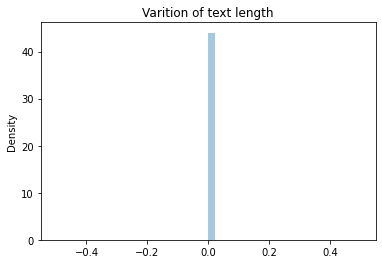

In [21]:
tl = text_length
tl.sort()
tl = tl[:len(text_length)-867]
sns.distplot(tl)
plt.title('Varition of text length')
plt.show()

In [ ]:
!pip install torch 
!pip install transformers
from transformers import AutoTokenizer, AutoModel
import torch

In [ ]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer, util

In [116]:
# Two lists of sentences

# sentences1 = [text1_sent[55]]
# sentences2 = [text2_sent[55]]

sentences1 = [text1[1165]]
sentences2 = [text2[1165]]

# sentences1 = [title1[55]]
# sentences2 = [title2[55]]

In [119]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

In [152]:
# df_en_exist.iloc[37]['Overall']
df_en_exist.iloc[37]['text2']


'if a patient suspected of having the virus has attended the surgery phe says the room they were seen in should not be used until it has been cleaned with detergent and disinfectant all items used to care for the patient should be bagged as clinical waste including the contents of the bin and quarantined until it is known whether the patient has tested positive for wncovfabric curtains and screens should also be bagged as infectious linen while any cloths or mop heads used during cleaning should be disposed of as single use itemsif the patient spent any time in communal areas these should be cleaned with detergent and disinfectant as soon as possibleaccording to the initial guidance gps who suspect a patient could have the virus during a consultation should leave the room immediately leaving the patient and their belongings inside wash their hands and conduct the remainder of the consultation by phone they should also contact the local health protection teamif gps suspect a patient has

In [153]:
#Load AutoModel from huggingface model repository
con =0;
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

cosine_values = list()

# //
for i in range(len(text1)):
  #Sentences we want sentence embeddings for
  if(type(text1[i])==str and type(text2[i])==str):
    con +=1;
    sentences = [text1[i] , text2[i]]

    #Tokenize sentences
    # maxi = max(len(text1[i].split()),len(text2[i].split()))
    encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

    #Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    #Perform pooling. In this case, mean pooling
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    # print('Shape of Embeddings',sentence_embeddings.shape)

    cosine_scores = util.cos_sim(sentence_embeddings[0], sentence_embeddings[1])

    cos_val = cosine_scores[0][0].tolist()
    if(cosine_scores[0][0].tolist() < 0):
      cos_val = 1 + cosine_scores[0][0].tolist()
    cosine_values.append( abs( cos_val*4 - df_en_exist.iloc[i]['Overall'] ))
    # if i%10==0:
      # print(i)
    print(cos_val)

print(cosine_values)
# for i in range(len(sentences1)):
#     print("{} Score: {:.4f}".format(i,cosine_scores[i][i]))

0.1966570019721985
0.453772634267807
0.757088303565979
0.8386037945747375
0.7983536720275879
0.08518610149621964
0.35414940118789673
0.6660773754119873
0.4297025799751282
0.022696666419506073
0.4977840185165405
0.21860578656196594
0.31034672260284424
0.44006937742233276
0.46756988763809204
0.2281893491744995
0.7406704425811768
0.09044121205806732
0.06201532855629921
0.837059736251831
0.996861600317061
0.9075255990028381
0.15489855408668518
0.8310675024986267
0.17016908526420593
0.6615943908691406
0.15443535149097443
0.45817893743515015
0.3102821409702301
0.10503440350294113
0.8485638499259949
0.2541835308074951
0.4933164119720459
0.8805354237556458
0.06147043779492378
0.2531419098377228
0.8185791373252869
0.7396457195281982
0.4895608723163605
0.25446048378944397
0.9128412008285522
0.38227003812789917
0.7187753319740295
0.49146023392677307
0.28687721490859985
0.7283704876899719
0.17545190453529358
0.20299232006072998
0.44376033544540405
0.451413631439209
0.19701088964939117
0.5602693557

In [154]:
print('Mean Error:', sum(cosine_values)/len(cosine_values) )

Mean Error: 1.9961472463073862


In [ ]:
# model = SentenceTransformer('all-MiniLM-L6-v2')


# #Compute embedding for both lists
# embeddings1 = model.encode(sentences1, convert_to_tensor=True)
# embeddings2 = model.encode(sentences2, convert_to_tensor=True)

# # print(embeddings1)
# # print(embeddings2)

# #Compute cosine-similarities
# cosine_scores = util.cos_sim(embeddings1, embeddings2)


# #Output the pairs with their score
# for i in range(len(sentences1)):
#     print("{} Score: {:.4f}".format(i,cosine_scores[i][i]))